In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
#importing the suicides file and printing the first five rows
suicides = pd.read_csv('Suicides in India 2001-2012.csv')
suicides.head()
suicides['Type_code'].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [134]:
suicides.loc[suicides['Type_code']=='Causes','Type'].unique()

array(['Illness (Aids/STD)', 'Bankruptcy or Sudden change in Economic',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children(Barrenness/Impotency',
       'Causes Not known', 'Unemployment',
       'Other Causes (Please Specity)', 'Poverty', 'Death of Dear Person',
       'Cancer', 'Suspected/Illicit Relation', 'Paralysis',
       'Bankruptcy or Sudden change in Economic Status',
       'Not having Children (Barrenness/Impotency'], dtype=object)

The data shows the causes, education, professional, social status and Means_adopted by gender, age_group and count.

Let's look at the Suicide Causes by gender.

In [6]:
suicide_causes = suicides[suicides['Type_code']=='Causes']
suicide_causes = suicide_causes.drop('Type_code',axis=1)
suicide_causes.head()

,State,Year,Type,Gender,Age_group,Total
0,A & N Islands,2001,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Dowry Dispute,Female,0-14,0


In [69]:
suicide_social = suicides[suicides['Type_code']=='Social_Status']
suicide_social_totals = suicide_social.groupby('Year')['Total'].agg(sum)
suicide_social = suicide_social.groupby(['Year','Type','Gender'])['Total'].agg(sum)
suicide_social = suicide_social.reset_index()
suicide_social_totals = suicide_social_totals.reset_index()

suicide_social = pd.merge(suicide_social,suicide_social_totals,left_on='Year',right_on='Year')
suicide_social.columns = ['Year','Type','Gender','Count','Yearly Count']
suicide_social['Percent_Year'] = suicide_social['Count']/suicide_social['Yearly Count']*100
suicide_social.head()

,Year,Type,Gender,Count,Yearly Count,Percent_Year
0,2001,Divorcee,Female,1929,325518,0.592594
1,2001,Divorcee,Male,2124,325518,0.652498
2,2001,Married,Female,84843,325518,26.063996
3,2001,Married,Male,140526,325518,43.169963
4,2001,Never Married,Female,28749,325518,8.831770


In [79]:
suicide_social_gender = suicide_social.groupby(['Year','Gender'])[['Count']].agg(sum)
suicide_social_type = suicide_social.groupby(['Year','Type'])[['Count']].agg(sum)

#suicide_social_gender = suicide_social_gender.drop(['Yearly Count','Percent_Year'],axis=1)
suicide_social_gender = suicide_social_gender.reset_index()
suicide_social_type = suicide_social_type.reset_index()


In [83]:
suicide_social_gender[suicide_social_gender['Gender']=='Female']['Count'].values

array([126576, 123255, 121890, 123138, 122994, 127230, 130026, 133419,
       137040, 142257, 143238, 140976], dtype=int64)

In [126]:
suicide_social[suicide_social['Gender']=='Female']

,Year,Type,Gender,Count,Yearly Count,Percent_Year
0,2001,Divorcee,Female,1929,325518,0.592594
2,2001,Married,Female,84843,325518,26.063996
4,2001,Never Married,Female,28749,325518,8.831770
6,2001,Seperated,Female,3411,325518,1.047868
8,2001,Widowed/Widower,Female,7644,325518,2.348257
10,2002,Divorcee,Female,2025,331251,0.611319
12,2002,Married,Female,80808,331251,24.394794
14,2002,Never Married,Female,27675,331251,8.354692
16,2002,Seperated,Female,3672,331251,1.108525
18,2002,Widowed/Widower,Female,9075,331251,2.739614


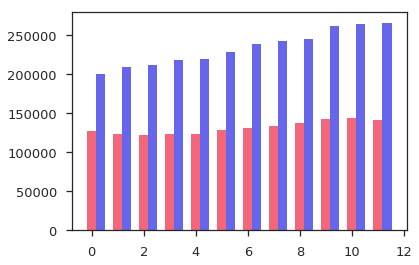

In [89]:
import seaborn as sns
female_annual = suicide_social_gender[suicide_social_gender['Gender']=='Female']['Count'].values
male_annual = suicide_social_gender[suicide_social_gender['Gender']=='Male']['Count'].values

with sns.axes_style("white"):
    sns.set_style("ticks")
    sns.set_context("talk")
    
        # plot details
    bar_width = 0.35
    epsilon = .015
    line_width = 1
    opacity = 0.7
    bar_female = plt.bar(x_points, female_annual, bar_width, 
                         color='#ED0020', alpha = 0.6, 
                         label = 'Female'
                        )
    bar_male = plt.bar(x_points+bar_width, male_annual, bar_width, 
                      color = '#0000DD', alpha = 0.6, 
                      label = 'Male')

In [123]:
female

NameError: name 'female' is not defined

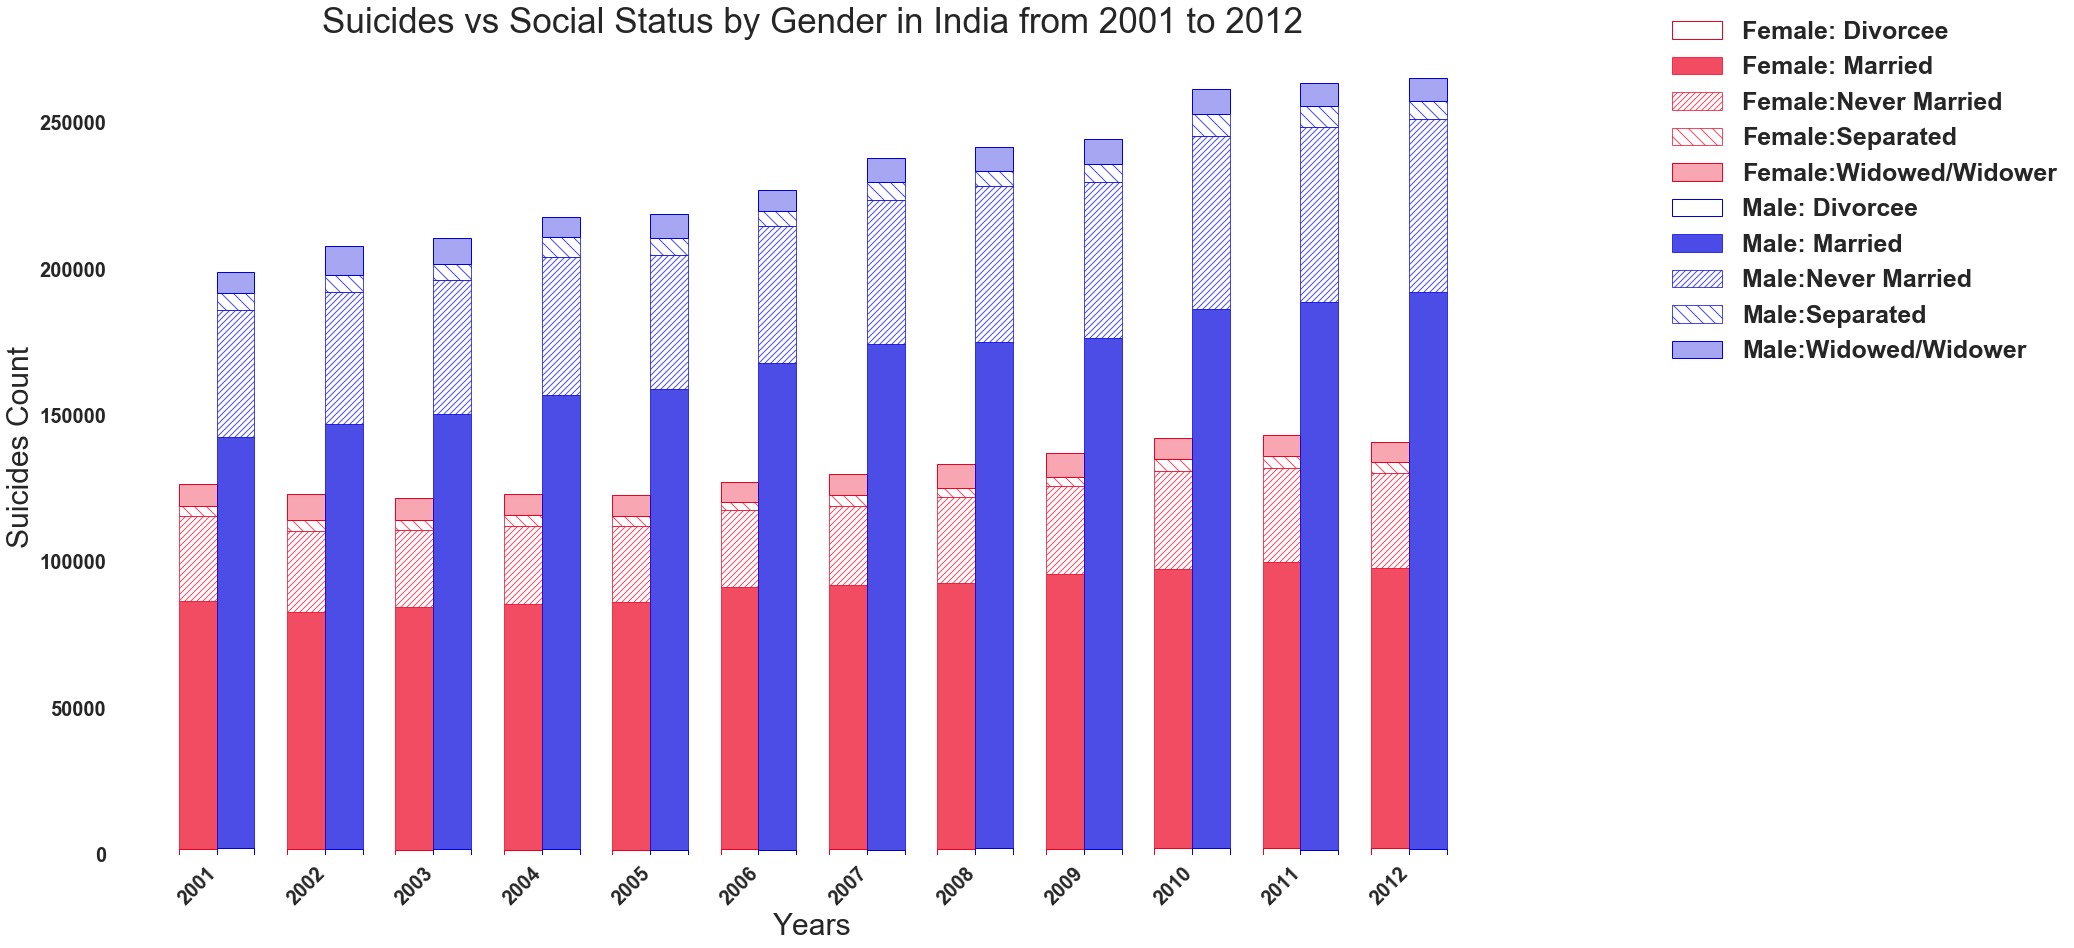

In [193]:
female_divorcee = suicide_social.loc[(suicide_social['Gender']=='Female') & (suicide_social['Type']=='Divorcee'),'Count'].values
female_married = suicide_social.loc[(suicide_social['Gender']=='Female') & (suicide_social['Type']=='Married'),'Count'].values
female_never_married = suicide_social.loc[(suicide_social['Gender']=='Female') & (suicide_social['Type']=='Never Married'),'Count'].values
female_separated = suicide_social.loc[(suicide_social['Gender']=='Female') & (suicide_social['Type']=='Seperated'),'Count'].values
female_widowed_widower = suicide_social.loc[(suicide_social['Gender']=='Female') & (suicide_social['Type']=='Widowed/Widower'),'Count'].values
male_divorcee = suicide_social.loc[(suicide_social['Gender']=='Male') & (suicide_social['Type']=='Divorcee'),'Count'].values
male_married = suicide_social.loc[(suicide_social['Gender']=='Male') & (suicide_social['Type']=='Married'),'Count'].values
male_never_married = suicide_social.loc[(suicide_social['Gender']=='Male') & (suicide_social['Type']=='Never Married'),'Count'].values
male_separated = suicide_social.loc[(suicide_social['Gender']=='Male') & (suicide_social['Type']=='Seperated'),'Count'].values
male_widowed_widower = suicide_social.loc[(suicide_social['Gender']=='Male') & (suicide_social['Type']=='Widowed/Widower'),'Count'].values

x_points = np.arange(12)

plt.figure(figsize=(25,15))
with sns.axes_style("white"):
    sns.set_context("talk")
    
        # plot details
    bar_width = 0.35
    epsilon = .015
    line_width = 1
    opacity = 0.7
    
    bar_female_divorcee = plt.bar(x_points,female_divorcee,bar_width,color='white',
                                  edgecolor = '#ED0020', 
                                  linewidth = line_width,
                                  label = 'Female: Divorcee')
    
    bar_female_married = plt.bar(x_points,female_married,bar_width, 
                                 bottom = female_divorcee,
                                 alpha = opacity, 
                                 color='#ED0020',
                                 edgecolor='#ED0020',
                                 linewidth=line_width,
                                 label = 'Female: Married')

    bar_female_never_married = plt.bar(x_points,female_never_married,bar_width,
                                       bottom = female_divorcee+female_married, 
                                       alpha = opacity, 
                                       color='white',
                                       edgecolor='#ED0020',
                                       linewidth = line_width,
                                       hatch = '////',
                                       label = 'Female:Never Married')
    bar_female_separated = plt.bar(x_points,female_separated,bar_width,
                                   bottom = female_divorcee+female_married+female_never_married,
                                   color = 'white',
                                   edgecolor = '#ED0020',
                                   alpha = opacity, 
                                   hatch = '\\\\',
                                   linewidth = line_width,
                                   label = 'Female:Separated')
    bar_female_widowed_widower = plt.bar(x_points,female_widowed_widower,bar_width,
                                         bottom = female_divorcee+female_married+female_never_married+female_separated,
                                         color='white',
                                         edgecolor = '#ED0020',
                                         linewidth = line_width,
                                         hatch = '......',
                                         label = 'Female:Widowed/Widower')
    
    bar_male_divorcee = plt.bar(x_points+bar_width,male_divorcee,bar_width,color='white',
                                edgecolor = '#0000DD',
                                linewidth = line_width,
                                label = 'Male: Divorcee')
    
    bar_male_married = plt.bar(x_points+bar_width,male_married,bar_width, 
                                 bottom = male_divorcee,
                                 alpha = opacity, 
                                 color='#0000DD',
                                 edgecolor='#0000DD',
                                 linewidth=line_width,
                                 label = 'Male: Married')
    
    bar_male_never_married = plt.bar(x_points+bar_width,male_never_married,bar_width,
                                     bottom = male_divorcee+male_married, 
                                     alpha = opacity, 
                                     color = 'white',
                                     edgecolor='#0000DD',
                                     linewidth = line_width,
                                     hatch = '////',
                                     label = 'Male:Never Married')
    
    bar_male_separated = plt.bar(x_points+bar_width,male_separated,bar_width,
                                   bottom = male_divorcee+male_married+male_never_married,
                                   alpha = opacity, 
                                   color = 'white',
                                   hatch = '\\\\',
                                   linewidth = line_width,
                                   edgecolor='#0000DD',label = 'Male:Separated')
    
    bar_male_widowed_widower = plt.bar(x_points+bar_width,male_widowed_widower,bar_width,
                                       bottom = male_divorcee+male_married+male_never_married+male_separated,
                                       color = 'white', 
                                       hatch = '......',
                                       linewidth = line_width,
                                       edgecolor='#0000DD',label = 'Male:Widowed/Widower')
    
    plt.xticks(x_points,np.arange(2001,2013,1), rotation=45)
    plt.tick_params(axis='both', which='both', labelsize=20)
    plt.ylabel('Suicides Count',fontsize = 30)
    plt.xlabel('Years',fontsize = 30)
    plt.legend(bbox_to_anchor=(1.1, 1.05),fontsize = 25)  
    plt.title('Suicides vs Social Status by Gender in India from 2001 to 2012', fontsize = 35)
    sns.despine(left=True,bottom=True)
    plt.show() 

The plot above shows the social status of people who committed suicides categorized by gender in India for the period 2001-2012.
Points to summarize from the graph
1. Total male suicides are significantly and consistently higher than females every year and every category.
2. Under both the genders, people who married constitute the highest suicide count. This makes sense since more percentage of the population are married means more the number committing suicide.
3. Married and Never Married categories constitute most of the suicides count, and again this makes sense since the other three categories will generally be very small percentage of the population.
